# Autoencoder on MNIST dataset

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))
K.get_session().run(tf.global_variables_initializer())

import sys
sys.path.append('util/')
from util import plotProgress

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
epochs = 50
batch = 128
latent_dim = 2
inter_dim1 = 128
inter_dim2 = 64
optimizer = 'adam'

In [5]:
inputs=Input(shape=(X_train.shape[1],))
x=inputs
# x=Dense(inter_dim1,activation='relu')(x)
# x=Dense(inter_dim2,activation='relu')(x)
latent=Dense(latent_dim,activation='relu')(x)
encoder=Model(inputs,latent,name='encoder')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [6]:
decode_in = Input(shape=(latent_dim,))
# decode=Dense(inter_dim2,activation='relu')(decode_in)
# decode=Dense(inter_dim1,activation='relu')(decode)
decode = Dense(X_train.shape[1],activation='sigmoid')(decode_in)
decoder = Model(decode_in,decode)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               2352      
Total params: 2,352
Trainable params: 2,352
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder=Model(inputs,decoder(encoder(inputs)))
autoencoder.compile(optimizer=optimizer,loss='binary_crossentropy')

In [8]:
history=autoencoder.fit(X_train,X_train,
                        epochs=epochs,
                        batch_size=batch,
                        validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 194us/step - loss: 0.2602 - val_loss: 0.2402
Epoch 2/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.2384 - val_loss: 0.2353
Epoch 3/50
60000/60000 [==============================] - 11s 189us/step - loss: 0.2347 - val_loss: 0.2321
Epoch 4/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.2317 - val_loss: 0.2293
Epoch 5/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.2296 - val_loss: 0.2277
Epoch 6/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.2283 - val_loss: 0.2265
Epoch 7/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.2275 - val_loss: 0.2258
Epoch 8/50
60000/60000 [==============================] - 10s 171us/step - loss: 0.2269 - val_loss: 0.2254
Epoch 9/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.2266 - val_

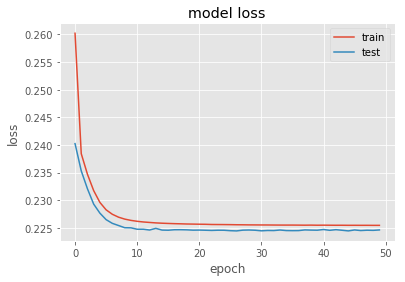

In [9]:
plotProgress(history)

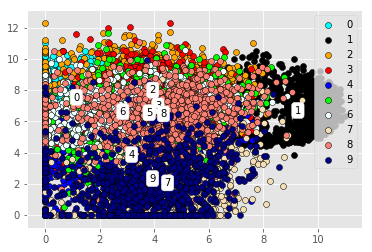

In [10]:
# get latent variables
lat=encoder.predict(X_test)
# plot scatter
cmap=['cyan','black','orange','red','blue','lime','azure','wheat','salmon','navy']
fig,ax=plt.subplots()
for i in range(10):
    ax.scatter(lat[y_test==i,0],lat[y_test==i,1],
                edgecolors='black',
                c=cmap[i],
                label=str(i))
    ax.annotate(str(i),(lat[y_test==i,0].mean(),lat[y_test==i,1].mean()),
               bbox=dict(boxstyle="round", fc="w"))
plt.legend()

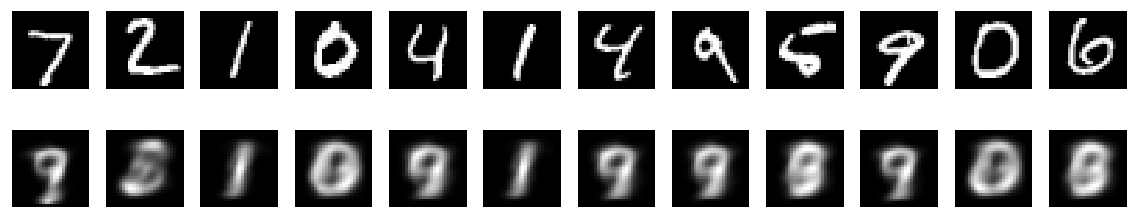

In [11]:
# get decoded digits
reconstructed=decoder.predict(lat)
# plot decoded
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()